In [117]:
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pywt
%matplotlib inline

In [118]:
label_file = '../../data/Final_Version/poor/590/label/d37e6_590_3.csv'
data_file = '../../data/Final_Version/poor/590/ACCL/new3/d37e6_acc_590_3.csv'
label = pd.read_csv(label_file, encoding='utf-8')
data = pd.read_csv(data_file, encoding='utf-8')
print(label.shape)
print(data.shape)

(20, 4)
(48147, 13)


In [119]:
x = data['xFilter']
y = data['yFilter']
z = data['zFilter']

t = data['time']
st = label['time(st)']
ed = label['time(ed)']

In [120]:
def timeToRowNum(time):
    return int(time*50)

In [121]:
def findInterval(time1,time2):
    left,right=[],[]
    for i in range(label.shape[0]):
        if st[i]<time1 and ed[i]>=time1:
            left.append(time1)
            if ed[i]<=time2:
                right.append(ed[i])
            else:
                right.append(time2)
        if st[i]>=time1 and st[i]<=time2:
            left.append(st[i])
            if(ed[i]<time2):
                right.append(ed[i])
            else:
                right.append(time2)
    return left,right

In [122]:
x_size,y_size=25,5
def plotWaveform(st_time,ed_time,ticker_size):
    left,right=findInterval(st_time,ed_time)
    print(left)
    print(right)
    rowNum1,rowNum2=timeToRowNum(st_time),timeToRowNum(ed_time)
    #plot z
    plt.figure(figsize=(x_size,y_size))
    #plt.grid(True)
    plt.plot((t[rowNum1:rowNum2]),z[rowNum1:rowNum2],label='normal')
    for i in range(len(left)):
        low,high=timeToRowNum(left[i]),timeToRowNum(right[i])
        if i ==0:
            plt.plot((t[low:high]),z[low:high],color='orangered',label = 'pothole')
        else:
            plt.plot((t[low:high]),z[low:high],color='orangered')
    ax=plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(ticker_size)) #Refine the axis, interval= ticker_size
    plt.xlabel('Time (s)',size=14)
    plt.ylabel('Amplitude',size=14)
    plt.title('AccelerationZ',size=16)
    plt.ylim([-5,5])
    plt.legend()
    plt.savefig("anomalyWavement.svg",bbox_inches='tight',pad_inches = 0)
    


In [123]:
#plotWaveform(0,960,50)

In [124]:
#plotWaveform(490,510,1)

[913.0, 918.0, 923.0, 925.4, 930.0]
[913.5, 918.8, 924.0, 926.4, 930]


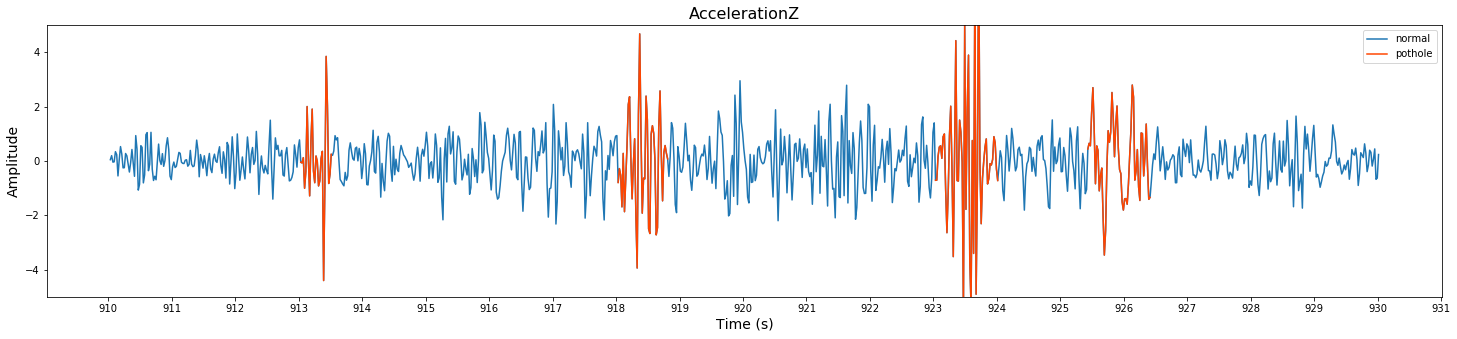

In [125]:
plotWaveform(910,930,1)